# Quickstart: codon-usage workflow

This notebook shows a minimal end-to-end workflow using the **codon-usage** package:

1. Set the project root and change the working directory.
2. Load example CDS FASTA files from `example_data/`.
3. Run `analyze_directory` to compute species-level codon usage.
4. Inspect the resulting tidy DataFrame.
5. Visualize total codons per species and codon-frequency distributions.

> **Note:** This notebook assumes you have installed the package in editable mode with:
> 
> ```bash
> pip install -e .
> ```
>
> If you move this repository to another location, update the `project_root` path
> in the first code cell below.


In [ ]:
from pathlib import Path
import os

import pandas as pd
import matplotlib.pyplot as plt

from codon_usage import analyze_directory

# Set this to the root of your codon-usage repository.
# Example (Windows): r"C:\Users\you\code\codon-usage"
# Example (Linux/Mac): "/home/you/code/codon-usage"
project_root = Path("CHANGE_ME_TO_YOUR_CODON_USAGE_PATH").expanduser().resolve()
os.chdir(project_root)

example_data_dir = project_root / "example_data"
if not example_data_dir.exists():
    raise FileNotFoundError(
        f"'example_data/' not found in {project_root}. "
        "Please update 'project_root' above to your local codon-usage path."
    )

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


## 1. Load example data and run `analyze_directory`

We point `analyze_directory` at the `example_data/` folder in the repository root.

Because we changed the working directory to `project_root` above, we can now
refer to the example data as `example_data/` directly.

In [36]:
DATA_DIR = Path("example_data")
DATA_DIR.resolve()

WindowsPath('A:/almesallmy-github/GitHubPortfolio/codon-usage/example_data')

In [37]:
df = analyze_directory(DATA_DIR)
df.head()

,species,codon,count,total_codons,freq_fraction,freq_percent
0,gam26.6,UUU,9,526,0.017110,1.711
1,gam26.6,UUC,16,526,0.030418,3.042
2,gam26.6,UUA,9,526,0.017110,1.711
3,gam26.6,UUG,11,526,0.020913,2.091
4,gam26.6,UCU,5,526,0.009506,0.951


The DataFrame is in **long format**, with one row per *(species, codon)* pair.

Columns:
- `species`
- `codon` (RNA alphabet: A/C/G/U)
- `count`
- `total_codons`
- `freq_fraction`
- `freq_percent`

In [38]:
df.shape

(640, 6)

## 2. Total codons per species

Because `total_codons` is constant within each species, we can take the first value per species or just sum `count`.

In [39]:
total_per_species = (
    df.groupby("species")["total_codons"].first().sort_values(ascending=False)
)
total_per_species

species
gam10.1     526
gam10.2     526
gam26.6     526
gam28.1     526
gam3        526
gam31.10    526
gam5        526
gam8        526
gam9.4      526
gam2        466
Name: total_codons, dtype: int64

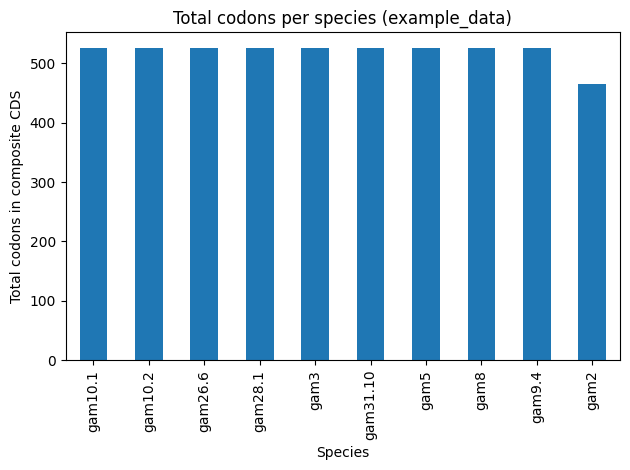

In [40]:
ax = total_per_species.plot(kind="bar")
ax.set_ylabel("Total codons in composite CDS")
ax.set_xlabel("Species")
ax.set_title("Total codons per species (example_data)")
plt.tight_layout()
plt.show()

## 3. Codon-frequency distribution for one species

Let's pick one example species and look at its codon usage profile.
We pick the first species appearing in the DataFrame.

In [41]:
example_species = df["species"].iloc[0]
example_species

'gam26.6'

In [42]:
sub = df[df["species"] == example_species].copy()
sub_sorted = sub.sort_values("freq_fraction", ascending=False)
sub_sorted.head(20)

,species,codon,count,total_codons,freq_fraction,freq_percent
43,gam26.6,AAG,26,526,0.049430,4.943
56,gam26.6,GAU,22,526,0.041825,4.183
35,gam26.6,AUG,19,526,0.036122,3.612
41,gam26.6,AAC,18,526,0.034221,3.422
48,gam26.6,GUU,17,526,0.032319,3.232
1,gam26.6,UUC,16,526,0.030418,3.042
59,gam26.6,GAG,16,526,0.030418,3.042
33,gam26.6,AUC,15,526,0.028517,2.852
52,gam26.6,GCU,15,526,0.028517,2.852
58,gam26.6,GAA,15,526,0.028517,2.852


<Figure size 1600x400 with 0 Axes>

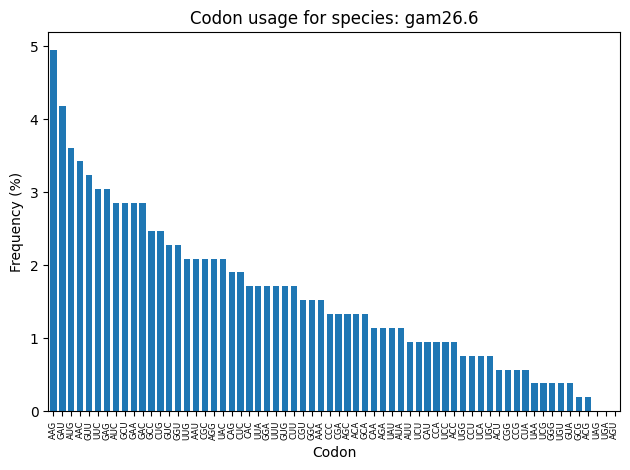

In [43]:
# All codons (64)
plt.figure(figsize=(16, 4))

ax = sub_sorted.plot(
    x="codon",
    y="freq_percent",
    kind="bar",
    legend=False,
    width=0.7,  # slightly narrower bars so they don't fully touch
)

ax.set_ylabel("Frequency (%)")
ax.set_xlabel("Codon")
ax.set_title(f"Codon usage for species: {example_species}")

plt.xticks(rotation=90, fontsize=6)
plt.margins(x=0.02)  # a bit of padding on left/right
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

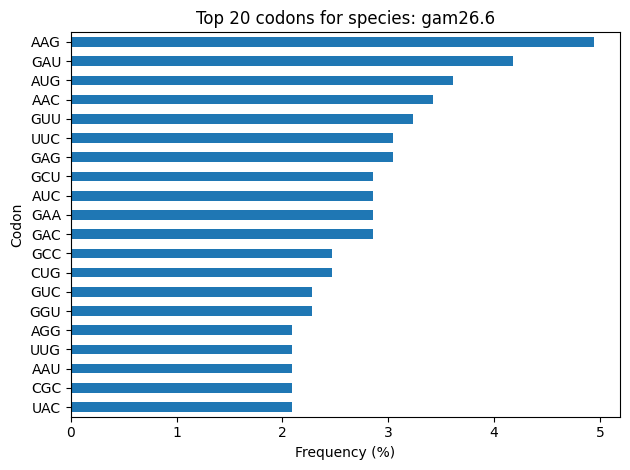

In [44]:
top_n = 20
top_sub = sub_sorted.head(top_n)

plt.figure(figsize=(6, 6))
ax = top_sub.sort_values("freq_percent").plot(
    x="codon",          # codon = labels
    y="freq_percent",   # freq = numeric values
    kind="barh",
    legend=False,
)

ax.set_xlabel("Frequency (%)")
ax.set_ylabel("Codon")
ax.set_title(f"Top {top_n} codons for species: {example_species}")
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

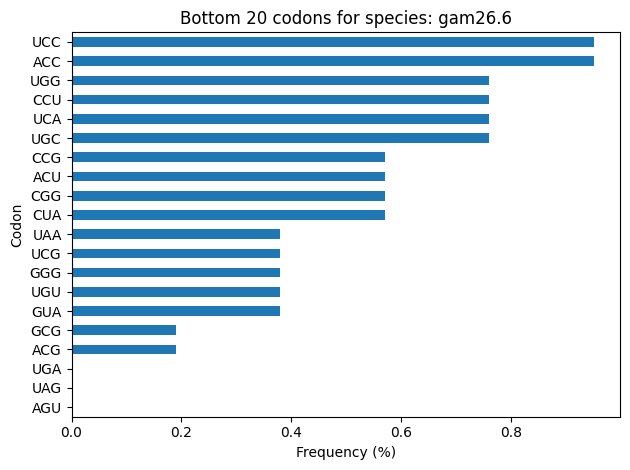

In [45]:
bottom_n = 20
bottom_sub = sub_sorted.tail(bottom_n)

plt.figure(figsize=(6, 6))
ax = bottom_sub.sort_values("freq_percent").plot(
    x="codon",
    y="freq_percent",
    kind="barh",
    legend=False,
)

ax.set_xlabel("Frequency (%)")
ax.set_ylabel("Codon")
ax.set_title(f"Bottom {bottom_n} codons for species: {example_species}")
plt.tight_layout()
plt.show()

This completes the basic codon-usage quickstart on the example dataset.